## Importing libraries

In [889]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import ppscore as pps
warnings.filterwarnings('ignore')

In [890]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.0.2', '2.2.3', '0.13.2', '3.9.4')

## 1. Load data

In [891]:
df = pd.read_csv('Cars.csv')

In [892]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [893]:
# Check the shape of your data
df.shape

(8128, 13)

In [894]:
# Statistical info Hint: look up .describe()
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [895]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [896]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 2. Exploratory Data Analysis



In [897]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [898]:
print(df.isnull().sum())

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


### Renaming



In [899]:
# Example: Renaming columns to match the expected names
df.rename(columns={
    'name': 'brand',
    'KilometersDriven': 'km_driven',
    'FuelType': 'fuel',
    # Add other mappings as needed
}, inplace=True)

In [900]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [901]:
# Mapping the owner labels to integers
owner_mapping = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 5
}

# Applying the mapping
df['owner'] = df['owner'].replace(owner_mapping)


In [902]:
# Check the column names
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [903]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [904]:
#Remove rows with CNG and LPG in fuel
df = df[~df['fuel'].isin(['CNG', 'LPG']) ]


In [905]:
df.shape

(8033, 13)

#### Clean mileage, engine, and max_power

In [906]:
# Remove 'kmpl' from mileage and convert to float
df['mileage'] = df['mileage'].str.replace(' kmpl', '').astype(float)

# Remove 'CC' from engine and convert to float
df['engine'] = df['engine'].str.replace(' CC', '').astype(float)

# Remove non-numeric from max_power and convert to float
df['max_power'] = df['max_power'].str.replace(' bhp', '').astype(float)

Simplify brand:

In [907]:
df['brand'] = df['brand'].str.split(' ').str[0]

Drop torque feature:

In [908]:
df.drop('torque', axis=1, inplace=True)

Remove Test Drive Cars

In [909]:
df = df[df['owner'] != 5]

Log-transform selling_price

In [910]:
df['selling_price'] = np.log(df['selling_price'])


#### Check final data

In [911]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [912]:
# Load cleaned dataset
df.to_csv('cleaned_cars.csv')


### 2.1 Univariate analyis

Single variable exploratory data anlaysis

In [913]:
# Get summary statistics
print(df.describe())


              year  selling_price     km_driven        owner      mileage  \
count  8028.000000    8028.000000  8.028000e+03  8028.000000  7814.000000   
mean   2013.815521      12.979337  6.977314e+04     1.458022    19.391962   
std       4.030836       0.838039  5.664419e+04     0.715283     4.001972   
min    1983.000000      10.308919  1.000000e+03     1.000000     0.000000   
25%    2011.000000      12.468437  3.500000e+04     1.000000    16.780000   
50%    2015.000000      13.017003  6.000000e+04     1.000000    19.300000   
75%    2017.000000      13.429848  9.800000e+04     2.000000    22.320000   
max    2020.000000      16.118096  2.360457e+06     4.000000    42.000000   

            engine    max_power        seats  
count  7814.000000  7820.000000  7814.000000  
mean   1462.914640    91.819726     5.421551  
std     504.759742    35.804513     0.963125  
min     624.000000     0.000000     2.000000  
25%    1197.000000    68.850000     5.000000  
50%    1248.000000    82

#### Countplot

From the cleaned dataset, the following features are categorical and suitable for count plots:

    brand: To see the distribution of car brands.
    owner: To check the distribution of ownership history (e.g., First Owner, Second Owner).
    fuel: To understand the breakdown of fuel types (e.g., Diesel, Petrol).
    seller_type: To identify how many cars are sold by Dealers vs. Individuals.
    transmission: To compare the number of cars with Manual vs. Automatic transmissions.


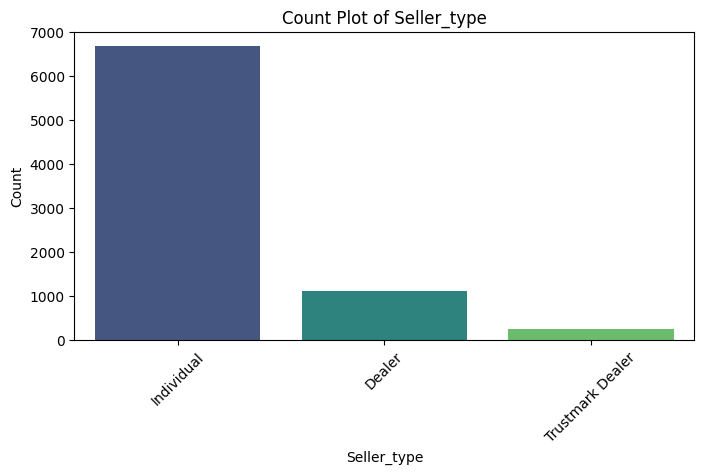

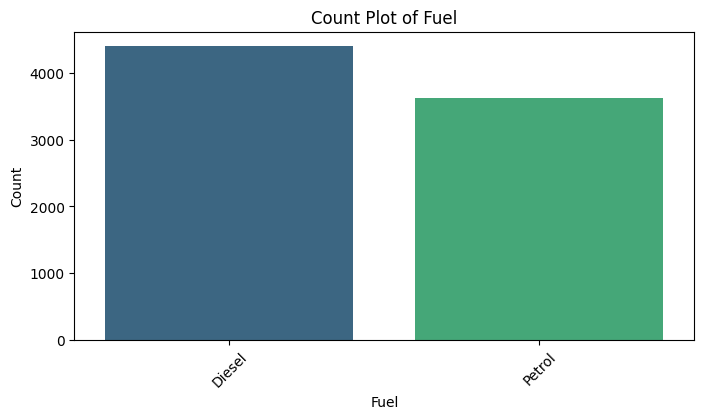

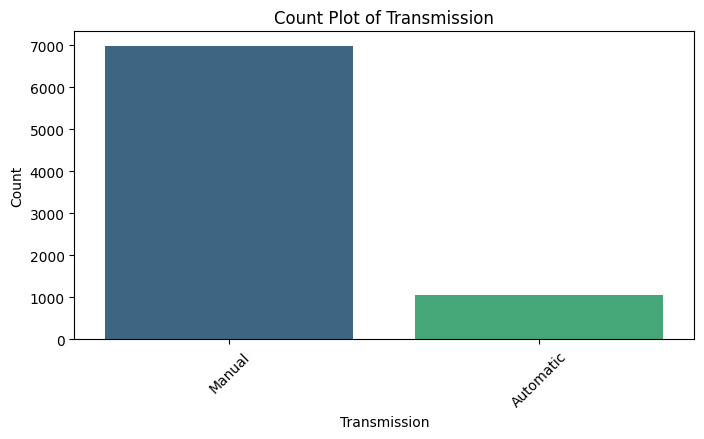

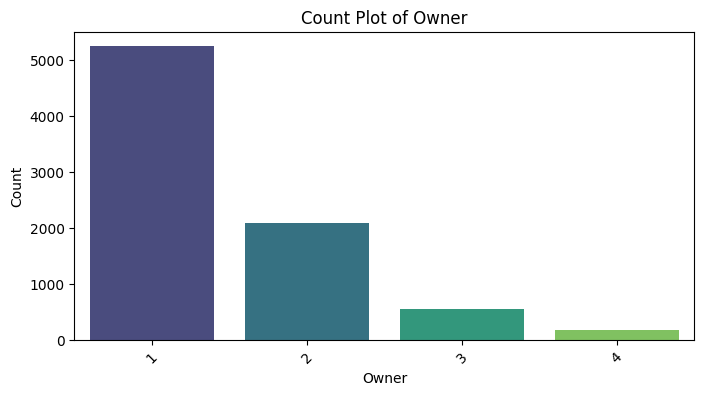

In [914]:
def vertical_count_plot(df, column):
    """
    Generates a vertical count plot for a categorical feature.
    """
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index, palette="viridis")
    plt.title(f'Count Plot of {column.capitalize()}')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Vertical count plot
vertical_count_plot(df, 'seller_type')
vertical_count_plot(df, 'fuel')
vertical_count_plot(df, 'transmission')
vertical_count_plot(df, 'owner')

Horizontal Count Plot

Use when the number of categories is large or labels are too long to display horizontally, like brand.

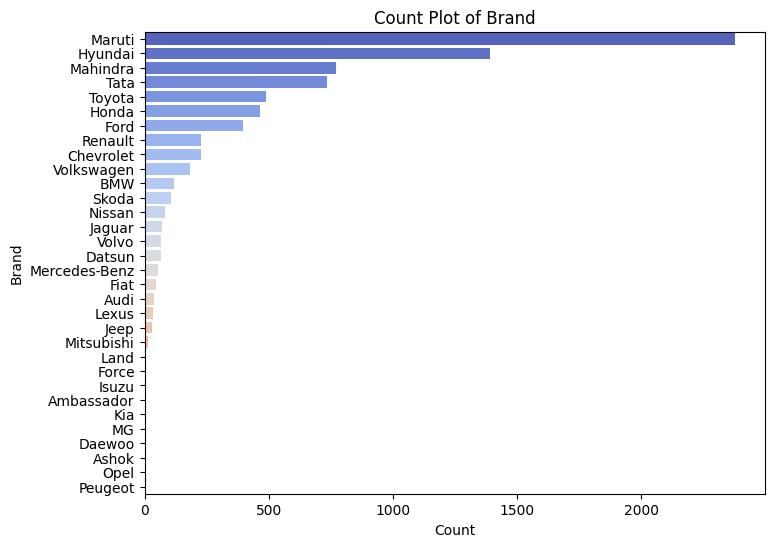

In [915]:
def horizontal_count_plot(df, column):
    """
    Generates a horizontal count plot for a categorical feature.
    """
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette="coolwarm")
    plt.title(f'Count Plot of {column.capitalize()}')
    plt.xlabel('Count')
    plt.ylabel(column.capitalize())
    plt.show()

#  Horizontal count plot
horizontal_count_plot(df, 'brand')


#### Distribution plot

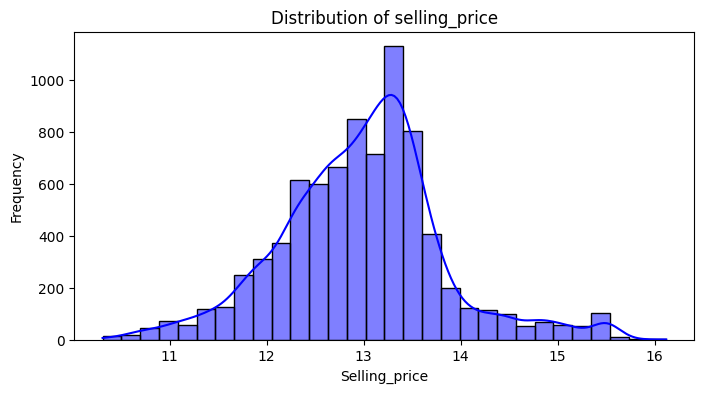

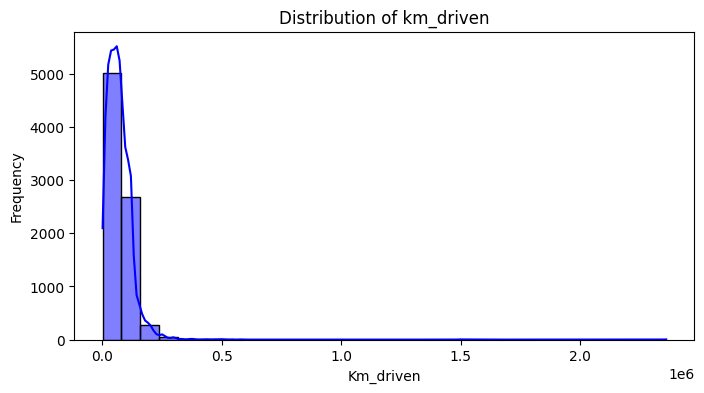

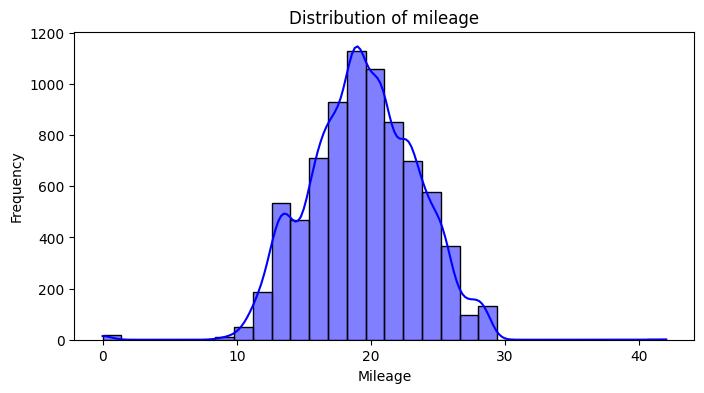

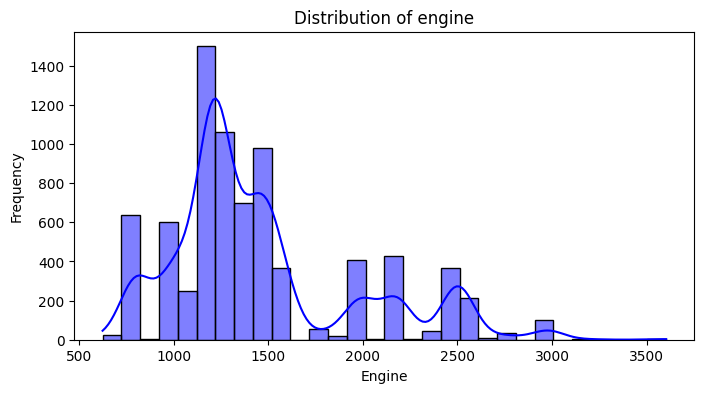

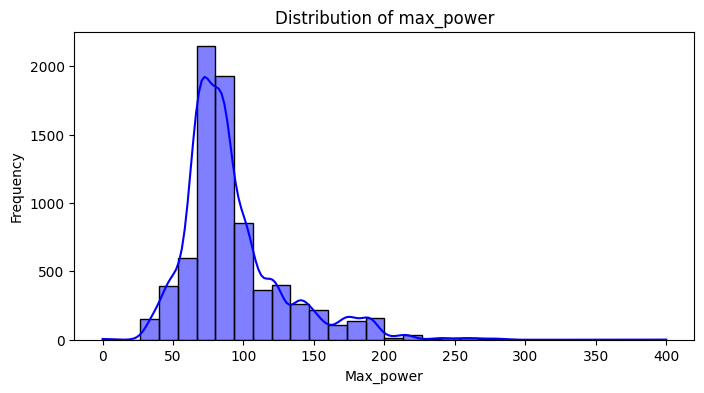

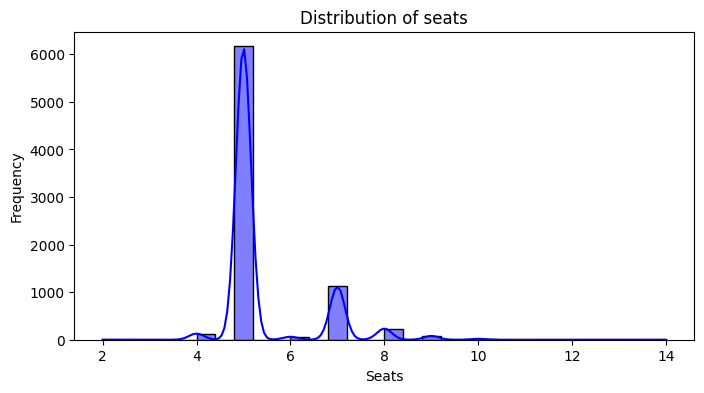

In [916]:

def plot_distributions(df, columns):
    """
    Generates distribution plots (histogram + KDE) for a list of numerical columns.
    """
    for col in columns:
        plt.figure(figsize=(8, 4))
        
        # Plot histogram with KDE
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col.capitalize())
        plt.ylabel('Frequency')
        plt.show()

# List of numerical columns to analyze
numerical_columns = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

# Call the function
plot_distributions(df, numerical_columns)


### 2.2 Multivariate analysis

Multiple variable exploratory data analysis

#### Boxplot

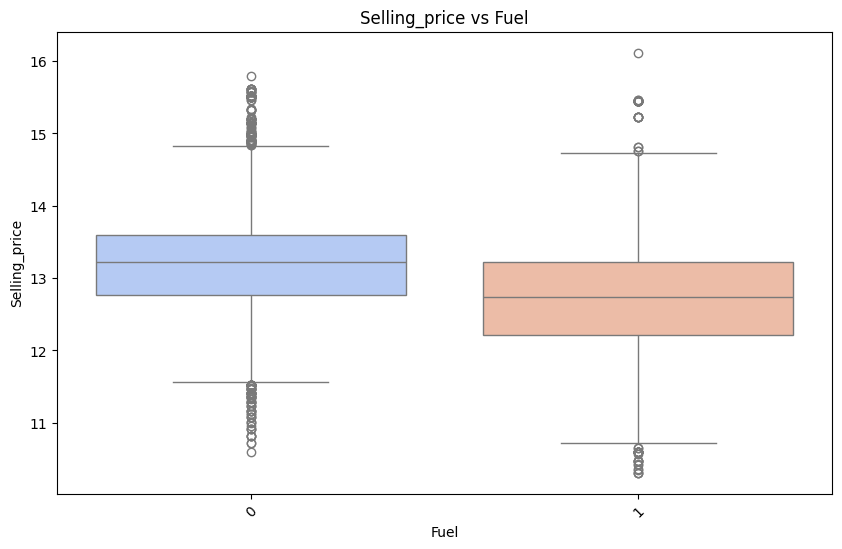

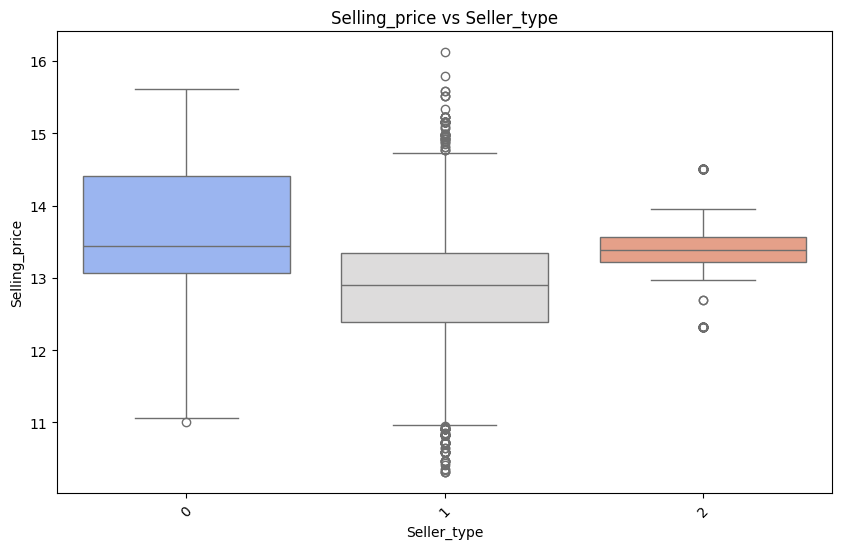

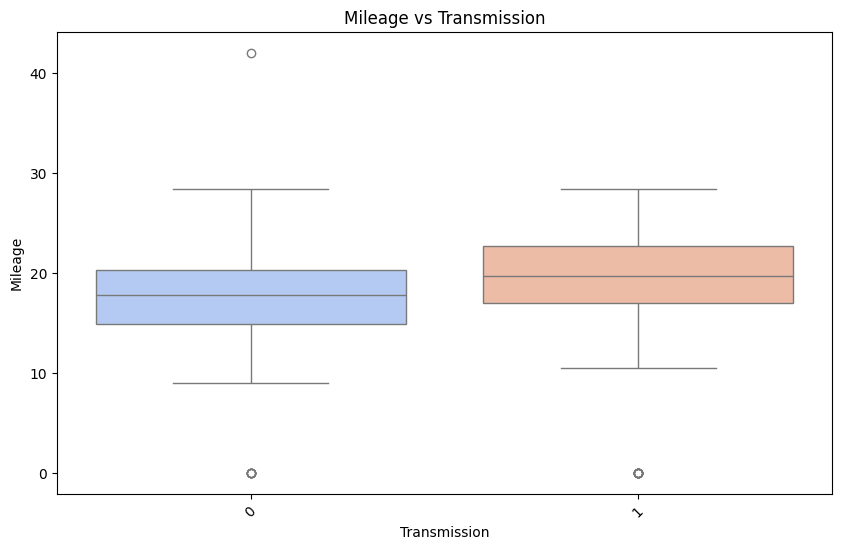

In [999]:
def plot_grouped_boxplots(df, numerical_column, categorical_column):
    """
    Generates grouped box plots for numerical vs. categorical variables.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=categorical_column, y=numerical_column, palette='coolwarm')
    plt.title(f'{numerical_column.capitalize()} vs {categorical_column.capitalize()}')
    plt.xlabel(categorical_column.capitalize())
    plt.ylabel(numerical_column.capitalize())
    plt.xticks(rotation=45)
    plt.show()

# Selling price segmented by fuel type
plot_grouped_boxplots(df, 'selling_price', 'fuel')

# Selling price segmented by seller type
plot_grouped_boxplots(df, 'selling_price', 'seller_type')

#  Mileage segmented by transmission
plot_grouped_boxplots(df, 'mileage', 'transmission')


#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the cars price.  It's also for checking whether certain features are too correlated.

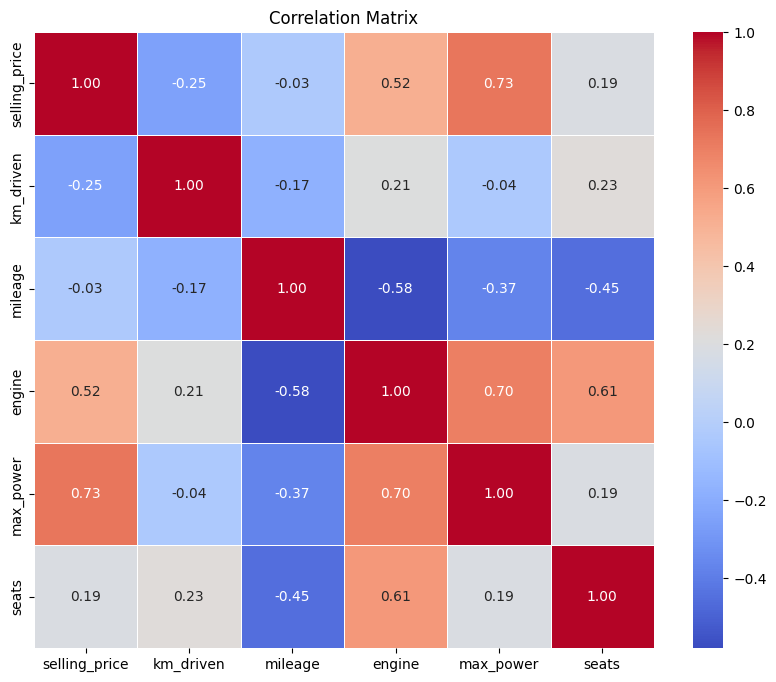

               selling_price  km_driven   mileage    engine  max_power  \
selling_price       1.000000  -0.250714 -0.033074  0.516000   0.729258   
km_driven          -0.250714   1.000000 -0.173733  0.209019  -0.036235   
mileage            -0.033074  -0.173733  1.000000 -0.578707  -0.372881   
engine              0.516000   0.209019 -0.578707  1.000000   0.701834   
max_power           0.729258  -0.036235 -0.372881  0.701834   1.000000   
seats               0.187066   0.228646 -0.454411  0.610481   0.189248   

                  seats  
selling_price  0.187066  
km_driven      0.228646  
mileage       -0.454411  
engine         0.610481  
max_power      0.189248  
seats          1.000000  


In [918]:
def correlation_matrix(df):
    """
    Computes and visualizes the correlation matrix for numerical features.
    """
    # Select numerical columns
    numerical_columns = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
    corr_matrix = df[numerical_columns].corr()

    # Plot the correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

    return corr_matrix

# Call the function
correlation = correlation_matrix(df)
print(correlation)


In [919]:
def strong_predictors(corr_matrix, target='selling_price', threshold=0.5):
    """
    Identifies features strongly correlated with the target variable.
    """
    strong_corr = corr_matrix[target][(corr_matrix[target].abs() > threshold) & (corr_matrix[target].abs() < 1)]
    return strong_corr

# Find strong predictors of selling_price
strong_factors = strong_predictors(correlation, target='selling_price')
print("Strong Predictors of Selling Price:\n", strong_factors)


Strong Predictors of Selling Price:
 engine       0.516000
max_power    0.729258
Name: selling_price, dtype: float64


#### Label encoding



In [920]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'brand' column
df['brand'] = encoder.fit_transform(df['brand'])

In [921]:
encoder.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [922]:


# Create a mapping of original brand names to encoded values
brand_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
brand_mapping



{'Ambassador': 0,
 'Ashok': 1,
 'Audi': 2,
 'BMW': 3,
 'Chevrolet': 4,
 'Daewoo': 5,
 'Datsun': 6,
 'Fiat': 7,
 'Force': 8,
 'Ford': 9,
 'Honda': 10,
 'Hyundai': 11,
 'Isuzu': 12,
 'Jaguar': 13,
 'Jeep': 14,
 'Kia': 15,
 'Land': 16,
 'Lexus': 17,
 'MG': 18,
 'Mahindra': 19,
 'Maruti': 20,
 'Mercedes-Benz': 21,
 'Mitsubishi': 22,
 'Nissan': 23,
 'Opel': 24,
 'Peugeot': 25,
 'Renault': 26,
 'Skoda': 27,
 'Tata': 28,
 'Toyota': 29,
 'Volkswagen': 30,
 'Volvo': 31}

Encoding 'fuel'

In [923]:
df['fuel'] = encoder.fit_transform(df['fuel'])
print("Unique values in 'fuel' after encoding:", df['fuel'].unique())

Unique values in 'fuel' after encoding: [0 1]


Encoding 'seller_type'

In [924]:
df['seller_type'] = encoder.fit_transform(df['seller_type'])
print("Unique values in 'seller_type' after encoding:", df['seller_type'].unique())

Unique values in 'seller_type' after encoding: [1 0 2]


Encoding 'transmission'

In [925]:

df['transmission'] = encoder.fit_transform(df['transmission'])
print("Unique values in 'transmission' after encoding:", df['transmission'].unique())


Unique values in 'transmission' after encoding: [1 0]


In [926]:
print(df.dtypes)


brand              int64
year               int64
selling_price    float64
km_driven          int64
fuel               int64
seller_type        int64
transmission       int64
owner              int64
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object


In [927]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Verify the numeric columns
print("Numeric columns:\n", numeric_df.columns)


Numeric columns:
 Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')


<Axes: >

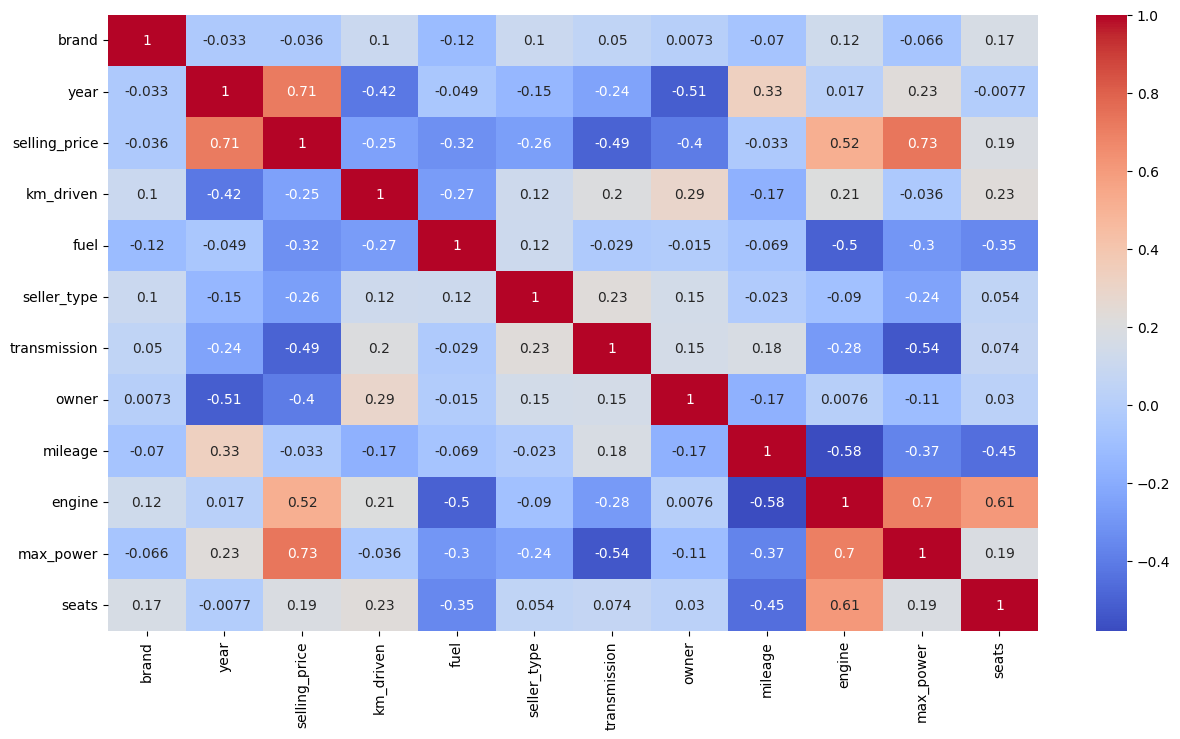

In [928]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

In [929]:
df.describe()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,8028.000000,8028.000000,8028.000000,8.028000e+03,8028.000000,8028.000000,8028.000000,8028.000000,7814.000000,7814.000000,7820.000000,7814.000000
mean,18.004235,2013.815521,12.979337,6.977314e+04,0.451794,0.890010,0.869706,1.458022,19.391962,1462.914640,91.819726,5.421551
std,7.388504,4.030836,0.838039,5.664419e+04,0.497702,0.395861,0.336648,0.715283,4.001972,504.759742,35.804513,0.963125
min,0.000000,1983.000000,10.308919,1.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,624.000000,0.000000,2.000000
25%,11.000000,2011.000000,12.468437,3.500000e+04,0.000000,1.000000,1.000000,1.000000,16.780000,1197.000000,68.850000,5.000000
50%,20.000000,2015.000000,13.017003,6.000000e+04,0.000000,1.000000,1.000000,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,20.000000,2017.000000,13.429848,9.800000e+04,1.000000,1.000000,1.000000,2.000000,22.320000,1582.000000,102.000000,5.000000
max,31.000000,2020.000000,16.118096,2.360457e+06,1.000000,2.000000,1.000000,4.000000,42.000000,3604.000000,400.000000,14.000000


The heatmap reveals that max_power, year, and engine are the strongest predictors of selling_price, showing strong positive correlations (e.g., max_power at 0.73 and year at 0.71), indicating that cars with higher power, newer manufacturing years, and larger engines tend to have higher prices. Negative correlations like km_driven (-0.32) and owner (-0.4) suggest that cars with higher mileage or multiple previous owners generally have lower prices. Additionally, engine and max_power are highly correlated (0.7), highlighting potential redundancy that could be addressed in feature selection. Other factors like fuel and seller_type show weaker correlations, making them less critical for predicting prices.

#### Predictive Power Score

In [930]:
import ppscore as pps

dfcopy = df.copy()
# Compute the PPS matrix
pps_matrix = pps.matrix(dfcopy)
print(pps_matrix.head())


       x              y   ppscore            case  is_valid_score  \
0  brand          brand  1.000000  predict_itself            True   
1  brand           year  0.034412      regression            True   
2  brand  selling_price  0.185468      regression            True   
3  brand      km_driven  0.043595      regression            True   
4  brand           fuel  0.136636      regression            True   

                metric  baseline_score   model_score                    model  
0                 None        0.000000      1.000000                     None  
1  mean absolute error        3.117400      3.010123  DecisionTreeRegressor()  
2  mean absolute error        0.628034      0.511553  DecisionTreeRegressor()  
3  mean absolute error    35677.460400  34122.084106  DecisionTreeRegressor()  
4  mean absolute error        0.452800      0.390931  DecisionTreeRegressor()  


       x              y   ppscore            case  is_valid_score  \
0  brand          brand  1.000000  predict_itself            True   
1  brand           year  0.034412      regression            True   
2  brand  selling_price  0.185468      regression            True   
3  brand      km_driven  0.043595      regression            True   
4  brand           fuel  0.136636      regression            True   

                metric  baseline_score   model_score                    model  
0                 None        0.000000      1.000000                     None  
1  mean absolute error        3.117400      3.010123  DecisionTreeRegressor()  
2  mean absolute error        0.628034      0.511553  DecisionTreeRegressor()  
3  mean absolute error    35677.460400  34122.084106  DecisionTreeRegressor()  
4  mean absolute error        0.452800      0.390931  DecisionTreeRegressor()  
Index(['x', 'y', 'ppscore', 'case', 'is_valid_score', 'metric',
       'baseline_score', 'model_score', '

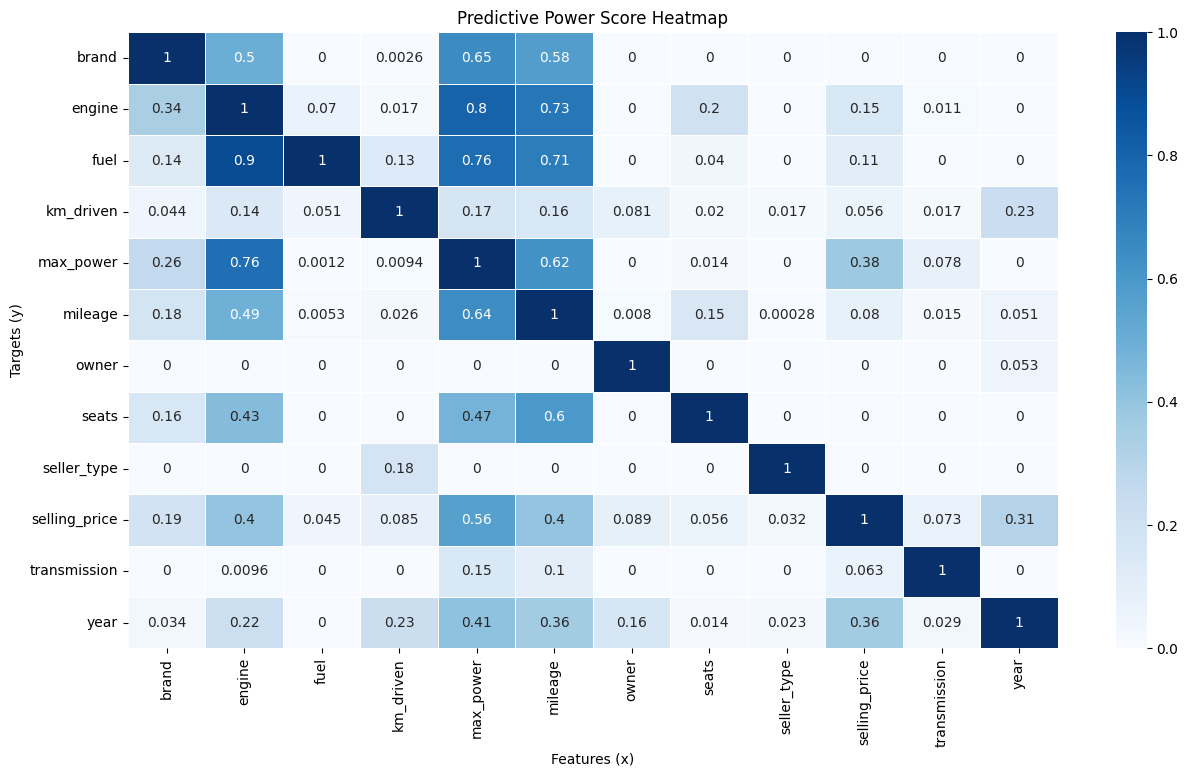

In [931]:
# Compute the PPS matrix
pps_matrix = pps.matrix(dfcopy)

# Debug: Inspect the structure of pps_matrix
print(pps_matrix.head())
print(pps_matrix.columns)

# Pivot the PPS matrix
matrix_df = pps_matrix.pivot(index='y', columns='x', values='ppscore').fillna(0)

# Plot the PPS heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidth=0.5, annot=True)
plt.title("Predictive Power Score Heatmap")
plt.xlabel("Features (x)")
plt.ylabel("Targets (y)")
plt.show()


## 3. Feature Engineering

We gonna skip for this tutorial.  But we can certainly try to combine some columsn to create new features.

## 4. Feature selection

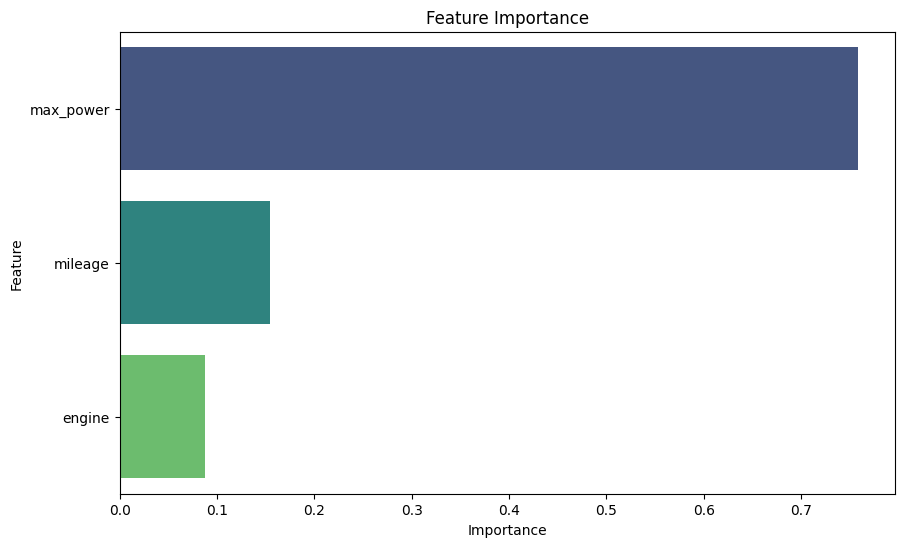

In [932]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# X is our selected features
X = df[['mileage', 'max_power', 'engine']]  # Include at least two strong features

# y is the target variable
y = df['selling_price']


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




# Visualize feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance")
plt.show()


Using Random Forest for feature importance reveals the most impactful predictors of the target variable, `selling_price`. By ranking features based on their contribution to the model, we can identify key factors such as `max_power`, `year`, and `engine`, which typically rank highest due to their strong relationship with car price. Features with minimal importance can be excluded to simplify the model and improve efficiency. This process helps refine the dataset, ensuring only the most relevant predictors are used for further analysis or modeling. Visualizing feature importance also provides clear insights into the relative weight of each feature.

## 5. Preprocessing

### Null values

In [933]:
X_train.isnull().sum()

mileage      154
max_power    149
engine       154
dtype: int64

In [934]:
y_train.isnull().sum()

np.int64(0)

In [935]:
X_test.isnull().sum()

mileage      60
max_power    59
engine       60
dtype: int64

In [936]:
y_test.isna().sum()

np.int64(0)

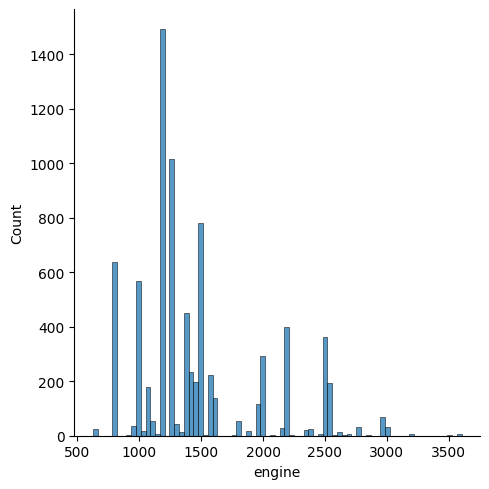

In [937]:
sns.displot(data=df, x='engine')

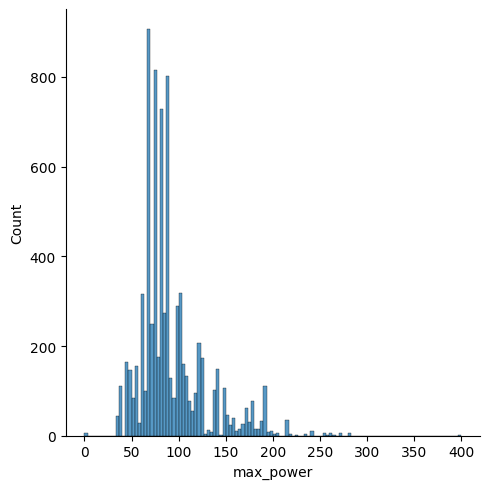

In [938]:
sns.displot(data=df, x='max_power')

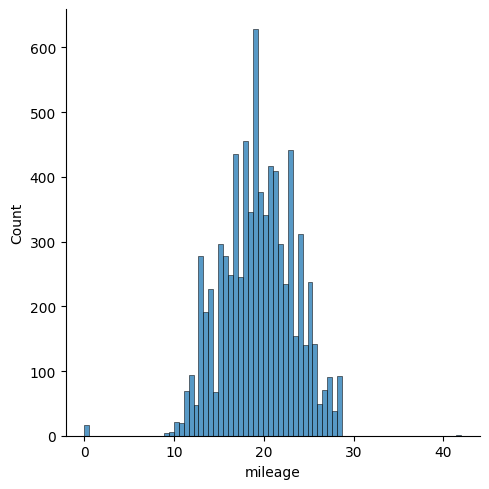

In [939]:
sns.displot(data=df, x='mileage')

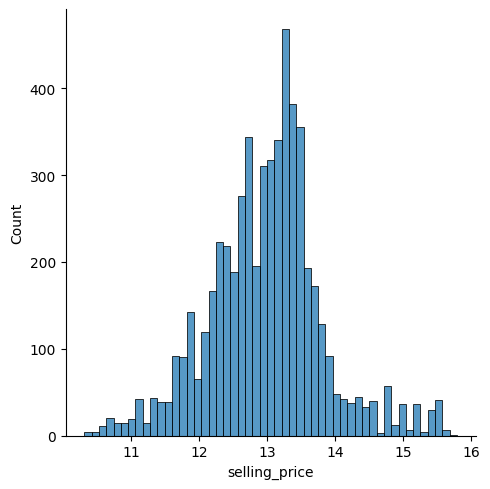

In [940]:
sns.displot(y_train)

In [941]:
#let's fill the training set first!
# X_train['school'].fillna(X_train['school'].mean(), inplace=True)

X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)

In [942]:
#let's fill the testing set with the training distribution first!
# X_test['school'].fillna(X_train['school'].mean(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)

In [943]:
#for missing y,  you don't replace them, you just delete them.
#don't forget to delete the associated x values as well
y_train_rows_with_na = y_train.isna()
y_train = y_train[~y_train_rows_with_na]
X_train = X_train[~y_train_rows_with_na]

y_test_rows_with_na = y_test.isna()
X_test = X_test[~y_test_rows_with_na]
y_test = y_test[~y_test_rows_with_na]

In [944]:
#check again
X_train[['max_power', 'mileage', 'engine']].isna().sum()

max_power    0
mileage      0
engine       0
dtype: int64

In [945]:
X_test[['max_power', 'mileage', 'engine']].isna().sum()

max_power    0
mileage      0
engine       0
dtype: int64

In [946]:
y_train.isna().sum(), y_test.isna().sum()

(np.int64(0), np.int64(0))

### Checking Outliers

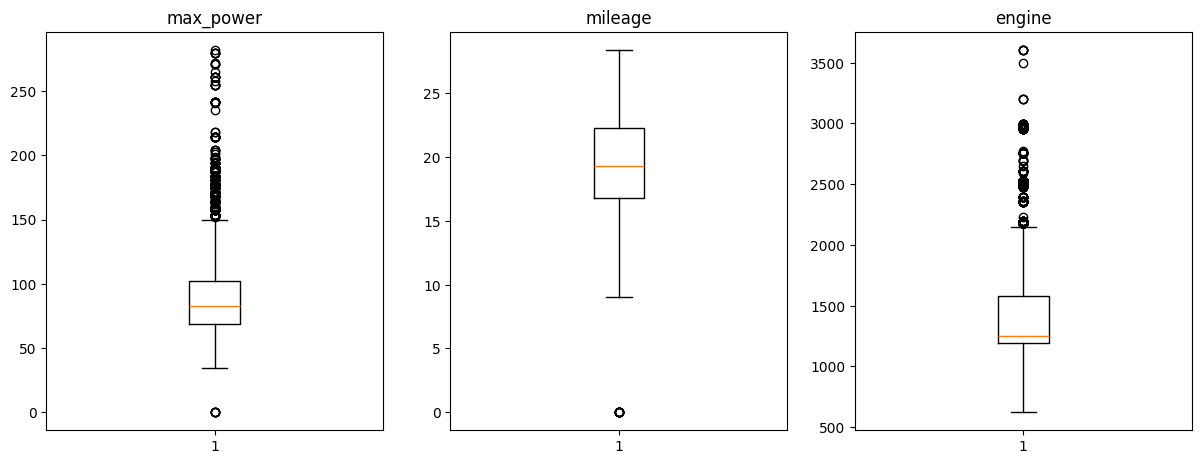

In [947]:
# Create a dictionary of columns.
col_dict = {'max_power':1,'mileage':2, 'engine':3 }

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [948]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [949]:
for col in X_train.columns:
    outlier_count(col)


---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%


### Scaling

In [950]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


In [951]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 3)
Shape of X_test:  (2409, 3)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


## 6. Modeling



In [952]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.2766306176967929
r2:  0.6068280376327744


### Much better: Cross validation + Grid search

In [953]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

Let's do some simple cross-validation here....

In [954]:
y_train.isna().sum()

np.int64(0)

In [955]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.28826618 -0.27024962 -0.28045811 -0.27964619 -0.28794044]; Mean: -0.2813121082121088
SVR - Score: [-0.23324612 -0.20246121 -0.2231437  -0.25241332 -0.22674815]; Mean: -0.2276024977932715
KNeighbors Regressor - Score: [-0.11226965 -0.11970243 -0.09771172 -0.11090923 -0.12234037]; Mean: -0.11258668188441505
Decision-Tree Regressor - Score: [-0.11492774 -0.10995854 -0.09589721 -0.10878656 -0.09950628]; Mean: -0.10581526487565765
Random-Forest Regressor - Score: [-0.08328103 -0.09036249 -0.08887354 -0.10585141 -0.08958811]; Mean: -0.09159131553364638


Hmm...it seems random forest do very well....how about we grid search further to find the best version of the model.

### Grid Search

In [956]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [957]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 12}

In [958]:
# Find your grid_search's best score
best_mse = grid.best_score_

In [959]:
best_mse  # ignore the minus because it's neg_mean_squared_error

np.float64(-0.09540504558381767)

In [960]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on Test Data
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_dep

## 7. Testing


In [961]:

yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.08629659462326443

## 8. Analysis:  Feature Importance


In [962]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.16302684, 0.73019852, 0.10677464])

<BarContainer object of 3 artists>

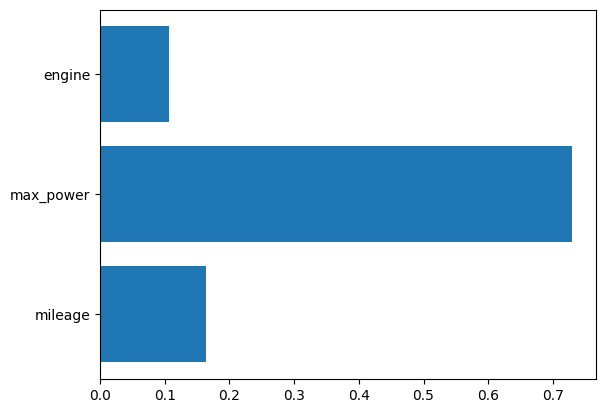

In [963]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

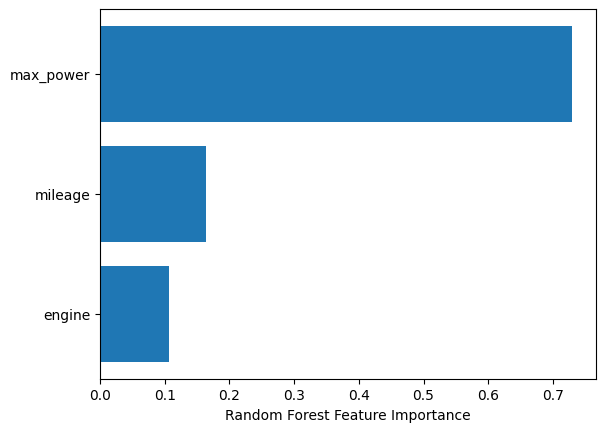

In [964]:
#hmm...let's sort first
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Permutation way



Text(0.5, 0, 'Random Forest Feature Importance')

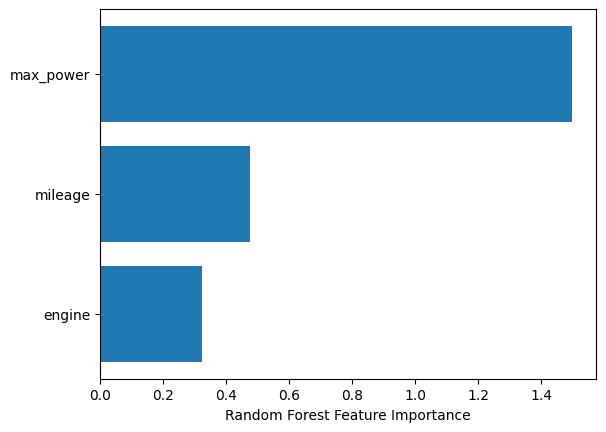

In [965]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Shap way


In [966]:
pip install shap


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [967]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

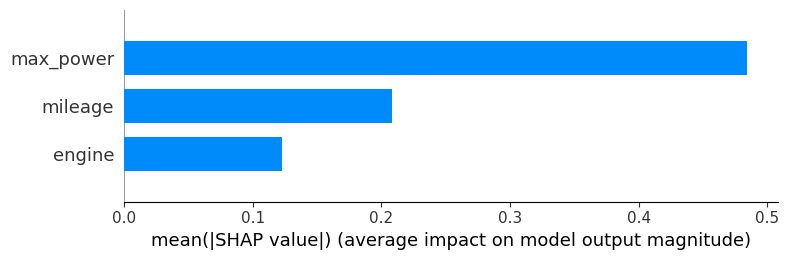

In [968]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

## 9. Inference

To provide inference service or deploy, it's best to save the model for latter use.

In [969]:
import pickle
# save the model to disk
filename = 'car price prediction.model'
pickle.dump(grid, open(filename, 'wb'))

In [974]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [993]:
#let's try to create one silly example
df[['engine', 'max_power', 'mileage', 'selling_price']].loc[1]

engine           1498.000000
max_power         103.520000
mileage            21.140000
selling_price      12.821258
Name: 1, dtype: float64

In [992]:

sample = np.array([[1498, 103.52, 21.14]])

In [985]:
predicted_cars_price = loaded_model.best_estimator_.predict(sample)
print(predicted_cars_price)


[15.18144854]


In [997]:
# Extract the actual price
actual_price = df.loc[1, "selling_price"]

# Predicted price from the model
predicted_price = predicted_cars_price[0]  # Ensure it's a scalar

# Print both prices and calculate the error
print(f"Actual Price: {actual_price}")
print(f"Predicted Price: {predicted_price}")
print(f"Error: {abs(actual_price - predicted_price)}")


Actual Price: 12.821258284620408
Predicted Price: 15.181448538172022
Error: 2.3601902535516146


In [998]:
percentage_error = abs(actual_price - predicted_price) / actual_price * 100
print(f"Percentage Error: {percentage_error:.2f}%")


Percentage Error: 18.41%
